# Tian Xu
# World Happiness Classification Competition

##### This report shows the exploration and application of 4 classification models to predict World Happiness. It encompasses EDA, feature examination, and model selection. The final model of the project is submitted to final model to the World Happiness AI Model Share competition.


##### Decision Tree Classifier: This model displayed the best performance in terms of Precision (68.07%) and Recall (53.76%). The best hyper parameter parameters identified for this model are:
##### Criterion: 'gini'
##### Max Depth: None
##### Min Samples Leaf: 4
##### Min Samples Split: 2




## Get data in and set up X_train, X_test, y_train objects

In [1]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [34]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()



,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


## Data Exploration and Visualization


### Destriptive statistics

In [3]:

data = X_train.copy()
data['Happiness'] = y_train.idxmax(axis=1)
data.corr()

<ipython-input-3-79b11f026eeb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
GDP per capita,1.000000,0.753791,0.840467,0.458313,-0.069164,0.349372,-0.352544
Social support,0.753791,1.000000,0.709605,0.502305,-0.015965,0.279549,-0.339582
Healthy life expectancy,0.840467,0.709605,1.000000,0.419038,-0.024471,0.371450,-0.410411
Freedom to make life choices,0.458313,0.502305,0.419038,1.000000,0.327923,0.496876,-0.362758
Generosity,-0.069164,-0.015965,-0.024471,0.327923,1.000000,0.327683,0.032479
Perceptions of corruption,0.349372,0.279549,0.371450,0.496876,0.327683,1.000000,-0.160908
Terrorist_attacks,-0.352544,-0.339582,-0.410411,-0.362758,0.032479,-0.160908,1.000000


In [4]:
desc_stats = data.describe(include='all') # 'include=all' will provide statistics for both numeric and non-numeric columns

print(desc_stats)

       Country or region  GDP per capita  Social support  \
count                 88       88.000000       88.000000   
unique                88             NaN             NaN   
top                 Peru             NaN             NaN   
freq                   1             NaN             NaN   
mean                 NaN        0.917148        1.213807   
std                  NaN        0.412638        0.293830   
min                  NaN        0.026000        0.000000   
25%                  NaN        0.626000        1.113250   
50%                  NaN        0.960000        1.249500   
75%                  NaN        1.249000        1.463500   
max                  NaN        1.684000        1.624000   

        Healthy life expectancy  Freedom to make life choices  Generosity  \
count                 88.000000                     88.000000   88.000000   
unique                      NaN                           NaN         NaN   
top                         NaN                 

## Explore bivariate results

From the plots, given other variables unchanged, GDP per capital has positive relationship with the happiness for the countries; social support has positive relationship with the happiness for the countries; health life expectance has positive relationship with the happiness for the countries.  



Due to the low R squre(less than 0.5), Generosity, Freedom to make life choices,  Perceptions of corruption, and Terrorist_attacks, have a lower predictive power in predicting happiness levels.


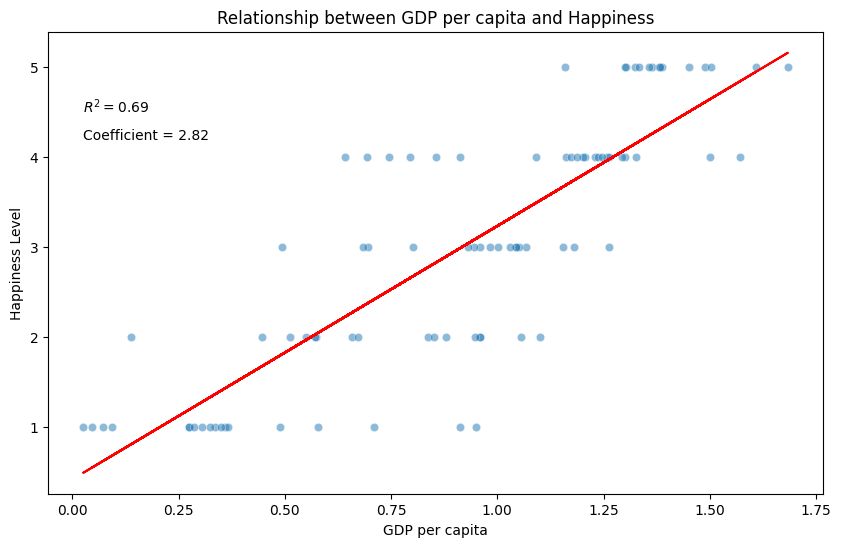

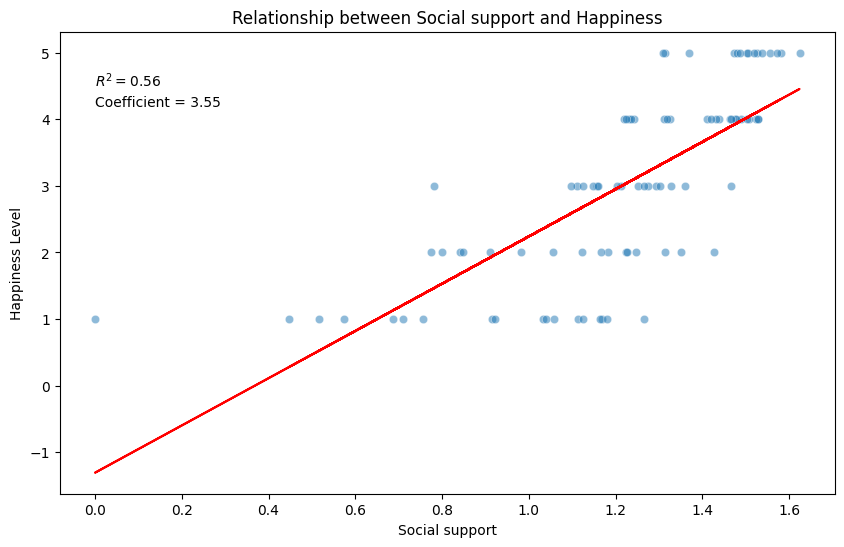

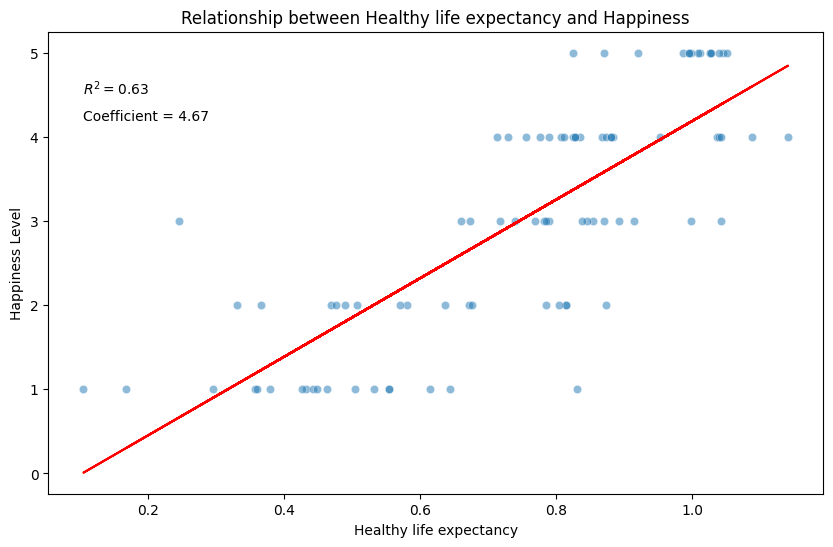

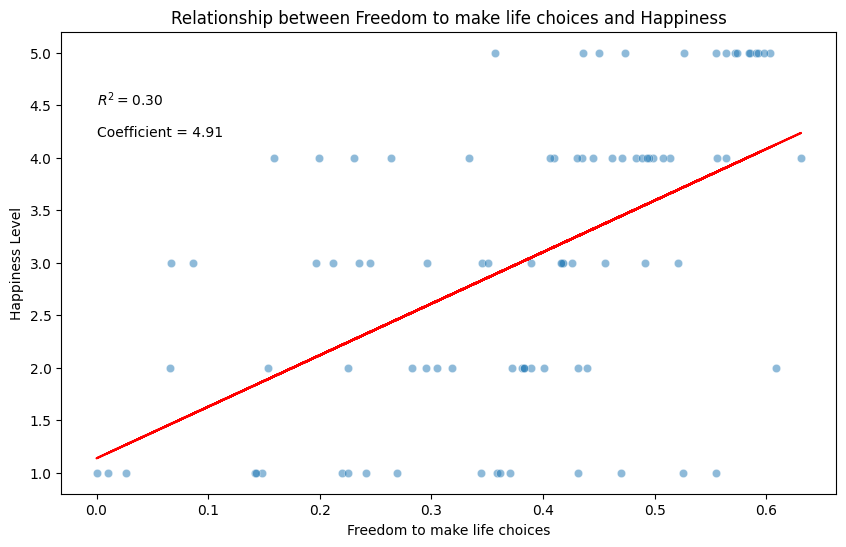

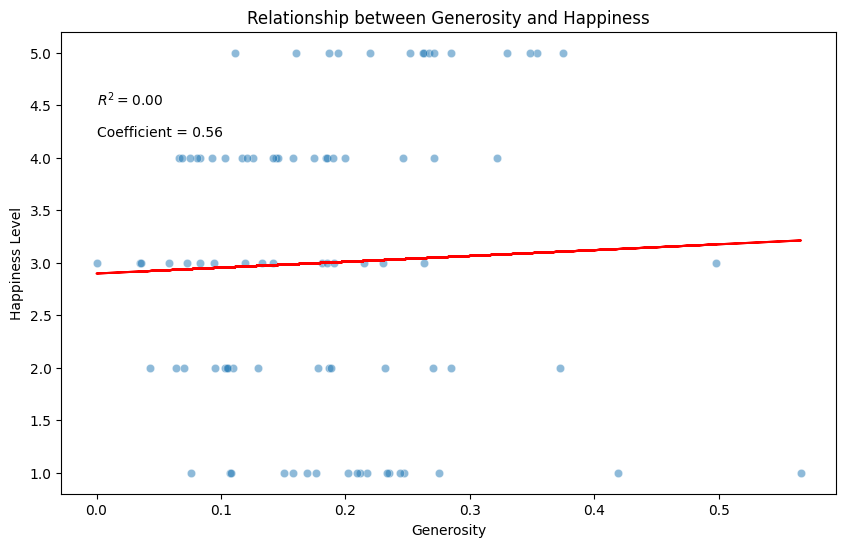

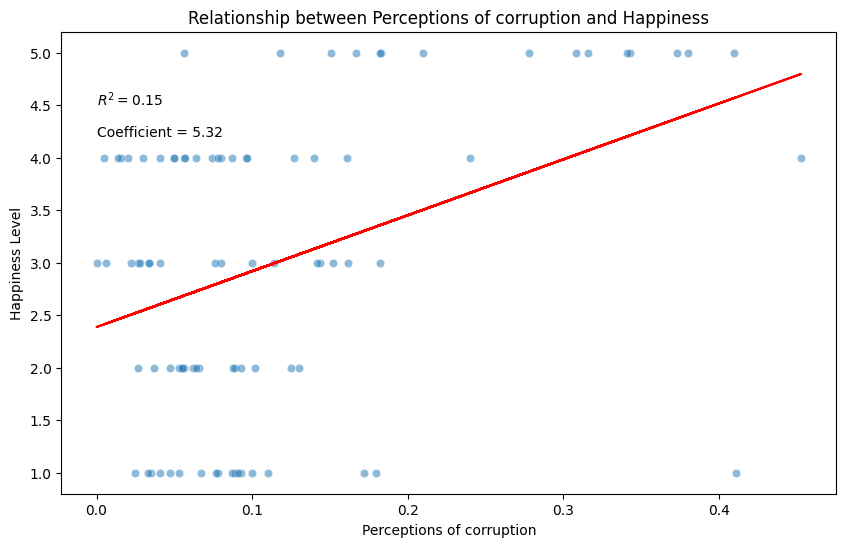

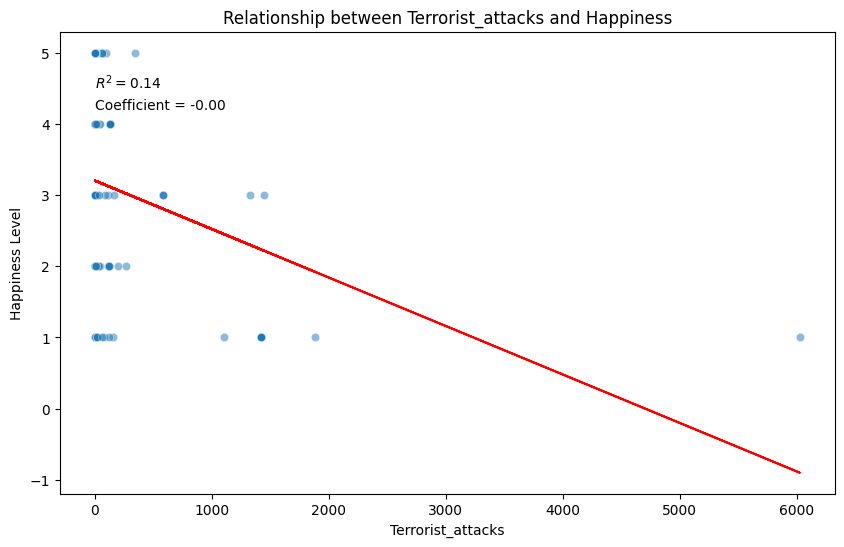

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Sample data (X_train has been previously defined)
data = X_train.copy()
data['Happiness'] = y_train.idxmax(axis=1)

# Mapping happiness categories to ordered numbers
happiness_mapping = {
    'Very Low': 1,
    'Low': 2,
    'Average': 3,
    'High': 4,
    'Very High': 5
}
data['Happiness'] = data['Happiness'].map(happiness_mapping)

# For each numeric column, visualize relationship with Happiness
for column in X_train.columns:
    if X_train[column].dtype in ['float64', 'int64']:  # If the column is numeric

        # Scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[column], y=data['Happiness'], alpha=0.5)

        # Fit a linear regression model
        X_column = data[[column]].values
        y_happiness = data['Happiness'].values

        reg = LinearRegression().fit(X_column, y_happiness)
        y_pred = reg.predict(X_column)

        # Plot the regression line
        plt.plot(X_column, y_pred, color='red')

        # Calculate r-squared and coefficient
        r2 = r2_score(y_happiness, y_pred)
        coef = reg.coef_[0]

        # Display r-squared and coefficient on the plot
        plt.text(np.min(X_column), 4.5, f'$R^2 = {r2:.2f}$', fontsize=10)
        plt.text(np.min(X_column), 4.2, f'Coefficient = {coef:.2f}', fontsize=10)

        plt.title(f'Relationship between {column} and Happiness')
        plt.ylabel('Happiness Level')
        plt.xlabel(column)
        plt.show()


###   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [29]:
# Write function to transform data with preprocessor

def preprocess_data(data):
    data.drop(['Country or region', 'name'], axis=1, inplace=True)
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data


##3. Fit model on preprocessed data and save preprocessor function and model


### Examine features that predict happiness categories using one or more models that allow for automatic feature selection
#### Explain any meaningful findings



### Random Forest
I used random forest to examine the features.

 The plot shows the top features by feature importance. The results shows that GDP per capita, health metrics, and social support are the top three predictors of happiness.

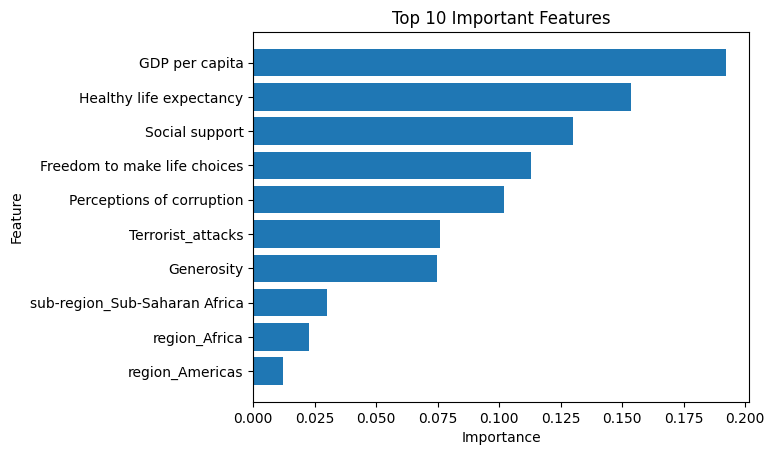

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#RandomForest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(preprocess_data(X_train.copy()), y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names and importance scores
categorical_encoded_features = preprocess.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(categorical_encoded_features)
features = sorted(zip(feature_importances, all_features), reverse=True)

# Plot the top features
plt.barh([f[1] for f in features[:10]], [f[0] for f in features[:10]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


#### Save preprocessor function to local "preprocessor.zip" file

In [31]:
import aimodelshare as ai

ai.export_preprocessor(preprocess_data,"")

Your preprocessor is now saved to 'preprocessor.zip'


## 4. Generate predictions from X_test data and submit model to competition




In [10]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://guku9jsrja.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [11]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.ModelPlayground(playground_url=apiurl)

### Model 1: Random Forest
#### n_estimators=100, max_depth=4

In [24]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_depth=4)
model.fit(preprocess_data(X_train.copy()), y_train_labels)
model.score(preprocess_data(X_train.copy()), y_train_labels)

0.9090909090909091

In [35]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocess_data(X_test.copy()))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)

Insert search tags to help users find your model (optional): Tian Model 1
Provide any useful notes about your model (optional): 
Your model has been submitted to experiment as model version 7.

Visit your Model Playground Page for more.
https://www.modelshare.ai/detail/model:3862


In [36]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,model_type,username,version
0,51.47%,50.31%,59.39%,53.69%,sklearn,RandomForestClassifier,newusertest,3
1,51.47%,51.35%,58.96%,53.64%,sklearn,GradientBoostingClassifier,newusertest,4
2,50.00%,48.88%,57.46%,52.72%,sklearn,RandomForestClassifier,newusertest,2
3,48.53%,46.60%,63.17%,51.68%,sklearn,RandomForestClassifier,xutian0117,7
4,45.59%,45.75%,52.35%,47.53%,sklearn,GradientBoostingClassifier,newusertest,5
5,45.59%,45.75%,52.35%,47.53%,unknown,unknown,newusertest,6
6,44.12%,40.99%,51.12%,47.20%,sklearn,RandomForestClassifier,newusertest,1


## 5. Repeat submission process to improve place on leaderboard


### Model2: Random Forest using GridSearchCV to fine tuning  

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [None, 3,10 ],
    'min_samples_split': [None, 1,3,5],
    'min_samples_leaf': [None, 1,2,5],
    'max_features': ['auto',None]
}

# Initialize the classifier
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the data
grid_search.fit(preprocess_data(X_train.copy()), y_train_labels)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.7156862745098039


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [41]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = best_rf_model.predict(preprocess_data(X_test.copy()))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = best_rf_model,
                                 prediction_submission=prediction_labels,
                                 preprocessor="preprocessor.zip")

This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)

Insert search tags to help users find your model (optional): Tian Model2
Provide any useful notes about your model (optional): 
Your model has been submitted to experiment as model version 8.

Visit your Model Playground Page for more.
https://www.modelshare.ai/detail/model:3862


In [42]:
# Compare two or more models
data=mycompetition.compare_models([1,2], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_1,model_version_2
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,3,5
5,max_features,sqrt,sqrt,sqrt
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_samples_leaf,1,1,1


### Model 3: Decision Tree using GridSearchCV

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1, verbose=2)

# Assuming you've encoded y_train_labels already
grid_search.fit(preprocess_data(X_train.copy()), y_train_labels)

best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.6248366013071895


In [52]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels = best_dt_model.predict(preprocess_data(X_test.copy()))

# Submit to Competition Leaderboard
mycompetition.submit_model(model = best_dt_model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)

Insert search tags to help users find your model (optional): Tian Model 3
Provide any useful notes about your model (optional): 
Your model has been submitted to experiment as model version 10.

Visit your Model Playground Page for more.
https://www.modelshare.ai/detail/model:3862


In [53]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,model_type,username,version
0,50.00%,48.25%,68.07%,53.76%,sklearn,DecisionTreeClassifier,xutian0117,10
1,51.47%,50.31%,59.39%,53.69%,sklearn,RandomForestClassifier,newusertest,3
2,51.47%,51.35%,58.96%,53.64%,sklearn,GradientBoostingClassifier,newusertest,4
3,50.00%,48.88%,57.46%,52.72%,sklearn,RandomForestClassifier,newusertest,2
4,48.53%,46.60%,63.17%,51.68%,sklearn,RandomForestClassifier,xutian0117,7
5,47.06%,43.86%,59.97%,50.82%,sklearn,RandomForestClassifier,xutian0117,8
6,45.59%,45.75%,52.35%,47.53%,sklearn,GradientBoostingClassifier,newusertest,5
7,45.59%,45.75%,52.35%,47.53%,unknown,unknown,newusertest,6
8,44.12%,40.99%,51.12%,47.20%,sklearn,RandomForestClassifier,newusertest,1
9,0.00%,nan%,nan%,nan%,unknown,unknown,xutian0117,9


In [55]:
# Compare two or more models
data=mycompetition.compare_models([1,2,4], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_1,model_version_2
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,3,5
5,max_features,sqrt,sqrt,sqrt
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_samples_leaf,1,1,1


,param_name,default_value,model_version_4
0,ccp_alpha,0.000000,0.000000
1,criterion,friedman_mse,friedman_mse
2,init,None,None
3,learning_rate,0.100000,1.000000
4,loss,log_loss,log_loss
5,max_depth,3,1
6,max_features,None,None
7,max_leaf_nodes,None,None
8,min_impurity_decrease,0.000000,0.000000
9,min_samples_leaf,1,1


### Model 4, GradientBoosting

In [56]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocess_data(X_train.copy()), y_train_labels)
model.score(preprocess_data(X_train.copy()), y_train_labels)


#-- Generate predicted values
prediction_labels = model.predict(preprocess_data(X_test.copy()))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model= model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)


This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 
Your model has been submitted to experiment as model version 11.

Visit your Model Playground Page for more.
https://www.modelshare.ai/detail/model:3862


### Model 5: Deep learning Model

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocess_data(X_train.copy()).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax'))

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocess_data(X_train.copy()), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Epoch 1/300
4/4 [==============================] - 1s 100ms/step - loss: 1.6077 - accuracy: 0.2879 - val_loss: 1.5707 - val_accuracy: 0.3182
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5953 - accuracy: 0.3030 - val_loss: 1.5664 - val_accuracy: 0.3182
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 1.5844 - accuracy: 0.3030 - val_loss: 1.5597 - val_accuracy: 0.3636
Epoch 4/300
4/4 [==============================] - 0s 20ms/step - loss: 1.5751 - accuracy: 0.3182 - val_loss: 1.5548 - val_accuracy: 0.4091
Epoch 5/300
4/4 [==============================] - 0s 18ms/step - loss: 1.5657 - accuracy: 0.3333 - val_loss: 1.5489 - val_accuracy: 0.4091
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5557 - accuracy: 0.3333 - val_loss: 1.5432 - val_accuracy: 0.4091
Epoch 7/300
4/4 [==============================] - 0s 15ms/step - loss: 1.5459 - accuracy: 0.3485 - val_loss: 1.5383 - val_accuracy: 0.4091
Epoch 8/300
4/4 [==

In [60]:
# Submit keras model:

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models

prediction_column_index=keras_model.predict(preprocess_data(X_test.copy())).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = keras_model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

3/3 [==============================] - 0s 3ms/step
Timeout: Model to ONNX conversion is taking longer than expected. This can be the case for big models.
Do you want to keep trying (1) or submit predictions only (2)? 2

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 
Your model has been submitted to experiment as model version 12.

Visit your Model Playground Page for more.
https://www.modelshare.ai/detail/model:3862


In [61]:
# Check leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,model_type,username,version
0,50.00%,48.25%,68.07%,53.76%,sklearn,DecisionTreeClassifier,xutian0117,10
1,51.47%,50.31%,59.39%,53.69%,sklearn,RandomForestClassifier,newusertest,3
2,51.47%,51.35%,58.96%,53.64%,sklearn,GradientBoostingClassifier,newusertest,4
3,51.47%,51.35%,58.96%,53.64%,sklearn,GradientBoostingClassifier,xutian0117,11
4,50.00%,48.88%,57.46%,52.72%,sklearn,RandomForestClassifier,newusertest,2
5,48.53%,46.60%,63.17%,51.68%,sklearn,RandomForestClassifier,xutian0117,7
6,47.06%,43.86%,59.97%,50.82%,sklearn,RandomForestClassifier,xutian0117,8
7,45.59%,45.75%,52.35%,47.53%,sklearn,GradientBoostingClassifier,newusertest,5
8,45.59%,45.75%,52.35%,47.53%,unknown,unknown,newusertest,6
9,44.12%,40.99%,51.12%,47.20%,sklearn,RandomForestClassifier,newusertest,1


### To summary, Decision Tree Classifier model showing the best Precision(68.07%) and Recall(53.76%), Best parameters is : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}. Gradinet Boosting Classifier shows the best Accuracy(51.47%) and F1_Score(51.35%), n_estimators=50, learning_rate=1.0